In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
#setup API key
import os
OPENAI_API_KEY=os.getenv("OPENAI_API_KEY")

In [4]:
#Setting up the environmet key
os.environ["OPENAI_API_KEY"]=OPENAI_API_KEY

In [5]:
from langchain_openai import ChatOpenAI

In [6]:
#Load the model
openai_model=ChatOpenAI(model="gpt-4o")

In [7]:
openai_model.invoke("hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_76544d79cb', 'id': 'chatcmpl-BbtipA750oSti2EiPdNx7awmVIB2B', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--0844e84a-b132-42db-8fa2-48b819ce00b3-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [8]:
#Lets import the required libraries
from langgraph.graph import StateGraph,MessagesState, START, END
from langgraph.graph.message import add_messages
from typing import Annotated, Literal, TypedDict   #
from langchain_core.tools import tool    #for creating Tool
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver   #To sustain the memory
from langgraph.prebuilt import ToolNode     #To create the Nodes for Tool

In [9]:
#Lets create a node
def call_model(state:MessagesState):   #Here the MessagesState is a Buildin class in LangGraph (you can check the code over github)
    #So we are defining the in funct that this variabe "state" will be the type of "MessagesState" look above cell
    question=state["messages"]
    response=openai_model.invoke(question)
    return {"messages":[response]}       #We have to append the answer in the message only

In [10]:
#define the StateGraph workflow
workflow=StateGraph(MessagesState)

In [11]:
#Adding noded
workflow.add_node('chatbot', call_model)  #Adding the node with the function call_model

In [12]:
workflow.add_edge(START, 'chatbot')  #Adding the edge from START to chatbot node
workflow.add_edge('chatbot', END)  #Adding the edge from chatbot node to END

In [13]:
#Lets save/compile the workflow
app1=workflow.compile()

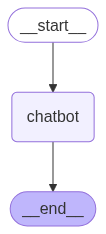

In [15]:
#Lets display the workflow
from IPython.display import Image,display
display(Image(app1.get_graph().draw_mermaid_png()))

In [20]:
input={"messages":["hi my name is yaseen"]}
response=app1.invoke(input)
response

{'messages': [HumanMessage(content='hi my name is yaseen', additional_kwargs={}, response_metadata={}, id='46d316c4-5756-414f-8281-d0d5f1b72766'),
  AIMessage(content='Hello Yaseen! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 13, 'total_tokens': 25, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BbtlrLzomsq5Y50MWo0ZACz2tXWcR', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--bba2ba74-e630-4908-8a6c-b8a007bcb799-0', usage_metadata={'input_tokens': 13, 'output_tokens': 12, 'total_tokens': 25, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [21]:
#Fetching the last message
response["messages"][-1].content

'Hello Yaseen! How can I assist you today?'

In [23]:
import pandas as pd
from typing import Dict, Optional, List
from langchain.agents import tool
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate
from langgraph.graph import StateGraph, END
import os

In [ ]:
#Load meeting data
@tool
def load_meeting_data() -> List[Dict]:
    """Tool to load meeting data from a CSV file."""
    df = pd.read_csv("yaseen_khan_missed_meetings_2.csv")
    meetings = df.to_dict(orient="records")
    return meetings

In [ ]:
openai_model=ChatOpenAI(model="gpt-4o")

In [51]:
@tool
def analyze_mom(mom: str) -> str:
    """Tool to analyze the meeting MoM and summarize it."""
    prompt = f"Summarize the following meeting MoM and list clear action items:\n\n{mom}"
    return openai_model.invoke(prompt)

In [52]:
@tool
def analyze_transcript(transcript: str) -> str:
    """Tool to analyze the meeting transcript and extract tasks."""
    prompt = f"Summarize this meeting transcript and extract any tasks, responsibilities, or follow-ups:\n\n{transcript}"
    return openai_model.invoke(prompt)

In [53]:
mom=""""Meeting Summary:
The team reviewed the quarterly sales performance and discussed areas for improvement.

Action Items:
- Prepare detailed analytics report.
- Escalate unresolved issues to the IT support.
- Arrange a session on data compliance practices."
"""
prompt = f"Summarize the following meeting MoM and list clear action items:\n\n{mom}"
openai_model.invoke(prompt)

AIMessage(content='**Meeting Summary:**\n\nThe team conducted a review of the quarterly sales performance, identifying areas that require improvements.\n\n**Action Items:**\n\n1. Prepare a detailed analytics report.\n2. Escalate unresolved issues to IT support.\n3. Arrange a session on data compliance practices.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 56, 'prompt_tokens': 67, 'total_tokens': 123, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_9bddfca6e2', 'id': 'chatcmpl-BbuXqx9Un5DD6xvnd7otLjxrUOBEW', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--ce6bc096-9c14-4d2c-8f85-f4ac80aec25e-0', usage_metadata={'input_tokens': 67, 'output_tokens': 56, 'total_tokens': 123, 'input_token_detai

In [54]:
# #Recommed followup actions based on the meeting data
# def recommend_followup_actions(meeting_data: List[Dict]) -> str:
#     """Recommend follow-up actions based on meeting data."""
#     prompt = "Based on the following meeting data, recommend follow-up actions:\n\n"
#     for meeting in meeting_data:
#         prompt += f"Date: {meeting['date']}, Participants: {meeting['participants']}, Summary: {meeting['summary']}\n"
#     return openai_model.invoke(prompt)

In [55]:
#Recommend Follow-Up Steps
@tool
def recommend_action(summary: str, meeting_title: str) -> str:
    """Recommend action steps based on the meeting summary."""
    prompt = f"""You are an assistant helping a user catch up on missed meetings. 
    Meeting: {meeting_title} Summary: {summary} 
    Suggest clear action steps the user should take."""
    return openai_model.invoke(prompt)

In [56]:
#Lets define the custome AgentState
class AgentState(Dict):
    meetings: Optional[List[Dict]] = None
    current_meeting: Optional[Dict] = None
    summary: Optional[str] = None
    recommendation: Optional[str] = None

In [57]:
#Define the workflow
workflow = StateGraph(AgentState)

In [58]:
# STEP 1: Load meetings
def step_load(state: AgentState):
    meetings = load_meeting_data()
    return {"meetings": meetings}

In [59]:
# STEP 2: Process each meeting one by one
def step_next_meeting(state: AgentState):
    if not state["meetings"]:
        return END
    meeting = state["meetings"].pop(0)
    return {"current_meeting": meeting, "meetings": state["meetings"]}

In [60]:
# STEP 3: Summarize MOM or Transcript
def step_summarize(state: AgentState):
    meeting = state["current_meeting"]
    if meeting.get("mom") and pd.notna(meeting["mom"]):
        summary = analyze_mom(meeting["mom"])
    elif meeting.get("transcript") and pd.notna(meeting["transcript"]):
        summary = analyze_transcript(meeting["transcript"])
    else:
        summary = "No MOM or transcript available."
    return {"summary": summary}

In [61]:
# STEP 4: Recommend action
def step_recommend(state: AgentState):
    meeting = state["current_meeting"]
    rec = recommend_action(state["summary"], meeting["title"])
    return {"recommendation": rec}

In [62]:
# BUILD GRAPH
workflow.add_node("load_data", step_load)
workflow.add_node("next_meeting", step_next_meeting)
workflow.add_node("summarize", step_summarize)
workflow.add_node("recommend", step_recommend)

In [63]:
# Add edges
workflow.set_entry_point("load_data")
workflow.add_edge("load_data", "next_meeting")
workflow.add_edge("next_meeting", "summarize")
workflow.add_edge("summarize", "recommend")
workflow.add_edge("recommend", "next_meeting")

In [64]:
graph = workflow.compile()

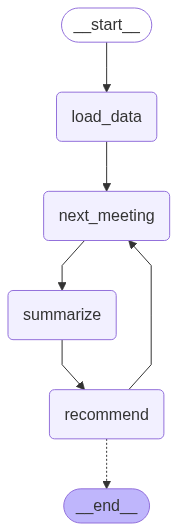

In [65]:
#Lets display the workflow
from IPython.display import Image,display
display(Image(graph.get_graph().draw_mermaid_png()))

In [66]:
# RUN
initial_state = AgentState()
final_state = graph.invoke(initial_state)

TypeError: BaseTool.__call__() missing 1 required positional argument: 'tool_input'